In [46]:
import os
import json
from web3 import Web3, HTTPProvider


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import datetime

In [2]:
ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
web3 = Web3(HTTPProvider(f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}"))

In [24]:
pool_addr = "0x8301AE4fc9c624d1D396cbDAa1ed877821D7C511"
lp_token_addr = "0xEd4064f376cB8d68F770FB1Ff088a3d0F3FF5c4d"
tricrypto_addr = "0xD51a44d3FaE010294C616388b506AcdA1bfAAE46"

In [4]:
admin_2 = "0xA464e6DCda8AC41e03616F95f4BC98a13b8922Dc"
admin = "0xeCb456EA5365865EbAb8a2661B0c503410e9B347"

In [5]:
pool_addr.lower()

'0x8301ae4fc9c624d1d396cbdaa1ed877821d7c511'

In [27]:
with open("./crveth.json", 'r') as f:
    abi = json.load(f)
crveth = web3.eth.contract(address=pool_addr, abi=abi)

with open("../tricrypto/tricrypto2.json", 'r') as f:
    abi = json.load(f)
tricrypto2 = web3.eth.contract(address=tricrypto_addr, abi=abi)

In [28]:
start_block = 13676983
current_block = web3.eth.get_block_number()

In [47]:
datetime.datetime.fromtimestamp(web3.eth.getBlock(13685675)['timestamp'])

datetime.datetime(2021, 11, 25, 21, 50, 4)

In [48]:
fees_for_range = []

transfer_filter = crveth.events.ClaimAdminFee.createFilter(
    fromBlock=start_block,
    toBlock=current_block
)
all_transfers = transfer_filter.get_all_entries()
claimed_lp_tokens = 0
for transfer in all_transfers:

    value = transfer['args']['tokens']
    block = transfer['blockNumber']
    tx_hash = transfer['transactionHash'].hex()
    claimed_lp_tokens = value * 1e-18
    lp_token_price = crveth.functions.lp_price().call(block_identifier=block) * 1e-18
    eth_price = tricrypto2.functions.price_oracle(1).call(block_identifier=block) * 1e-18
    timestamp = datetime.datetime.fromtimestamp(web3.eth.getBlock(block)['timestamp'])

    dict_fees = {
        'block': block,
        'timestamp': timestamp,
        'lp_tokens': claimed_lp_tokens,
        'lp_token_price': lp_token_price,
        'eth_price': eth_price,
        'total_claimed_eth': claimed_lp_tokens * lp_token_price,
        'total_claimed_usd': claimed_lp_tokens * lp_token_price * eth_price,
        'tx_hash': tx_hash
    }
    fees_for_range.append(dict_fees)

df_fees = pd.DataFrame(fees_for_range)
df_fees

,block,timestamp,lp_tokens,lp_token_price,eth_price,total_claimed_eth,total_claimed_usd,tx_hash
0,13679936,2021-11-24 23:52:07,0.907424,0.072970,4258.862428,0.066215,281.999560,0x84455bc2bfe64b3b3f7d376509627a4b2f49e829471a...
1,13680249,2021-11-25 01:06:08,0.067634,0.074352,4261.559880,0.005029,21.430230,0x736ccb2e6039d7650bcdb0db5a970ffe961bcca9aa39...
2,13680817,2021-11-25 03:12:00,0.097719,0.072750,4324.233635,0.007109,30.741352,0x7003bee5457010bce410b952ba38edd5697ed68633fa...
3,13682288,2021-11-25 08:56:23,0.146441,0.073215,4297.494835,0.010722,46.075944,0xb37003fedfcb87660dfeb52171ac87184e2f769f7575...
4,13682643,2021-11-25 10:21:04,0.214296,0.075104,4292.258684,0.016095,69.082095,0x5afffade8fef840400568dccbbc037cf084adb23cdd3...
5,13682852,2021-11-25 11:10:04,0.119543,0.074465,4282.741252,0.008902,38.124086,0x950954ecb6e0e02e8f53931dfc5db9723cbb64e24999...
6,13685675,2021-11-25 21:50:04,1.256275,0.074273,4515.817150,0.093307,421.356221,0x4a2bcbff6af93a1b2fc0db6dfa143bdbe22581d5f6f5...
7,13686045,2021-11-25 23:10:06,0.074230,0.073073,4503.216868,0.005424,24.426471,0xaef01423f4b49b25ba39c1e6065a1cad9b2fbee472a4...
8,13686056,2021-11-25 23:13:45,0.033646,0.073020,4500.560984,0.002457,11.056998,0x3e318eb805f320b28cb042934b2cde114a94a7edce8b...
9,13690507,2021-11-26 16:14:18,1.578490,0.070254,4094.055053,0.110896,454.014025,0x8eb6928c33aa4d419ff618a457973067c60b652a482a...


In [38]:
print(df_fees.where(df_fees.total_claimed_usd == df_fees.total_claimed_usd.max()).tx_hash.dropna().values[0])

0x431cec6f2b68afae27b58005d07493e7f2aed1759689ad97f07106ba9fdf014c


In [49]:
df_fees.set_index('timestamp', inplace=True)

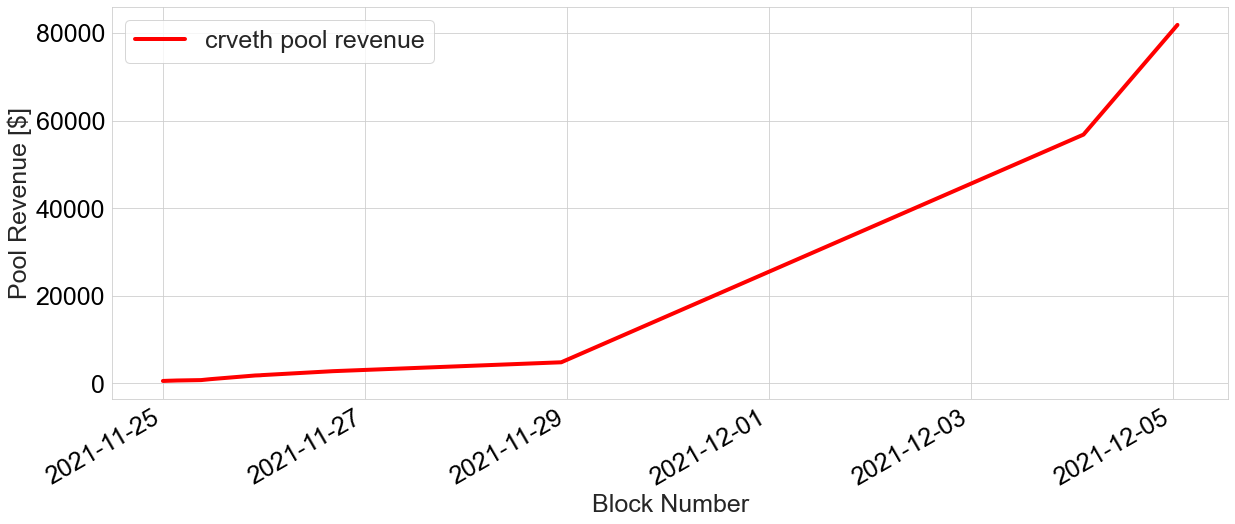

In [55]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['total_claimed_usd']*2).cumsum().plot(
    ax=ax,
    color='red',
    label='crveth pool revenue',
    lw=4
)

ax.set_ylabel("Pool Revenue [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);

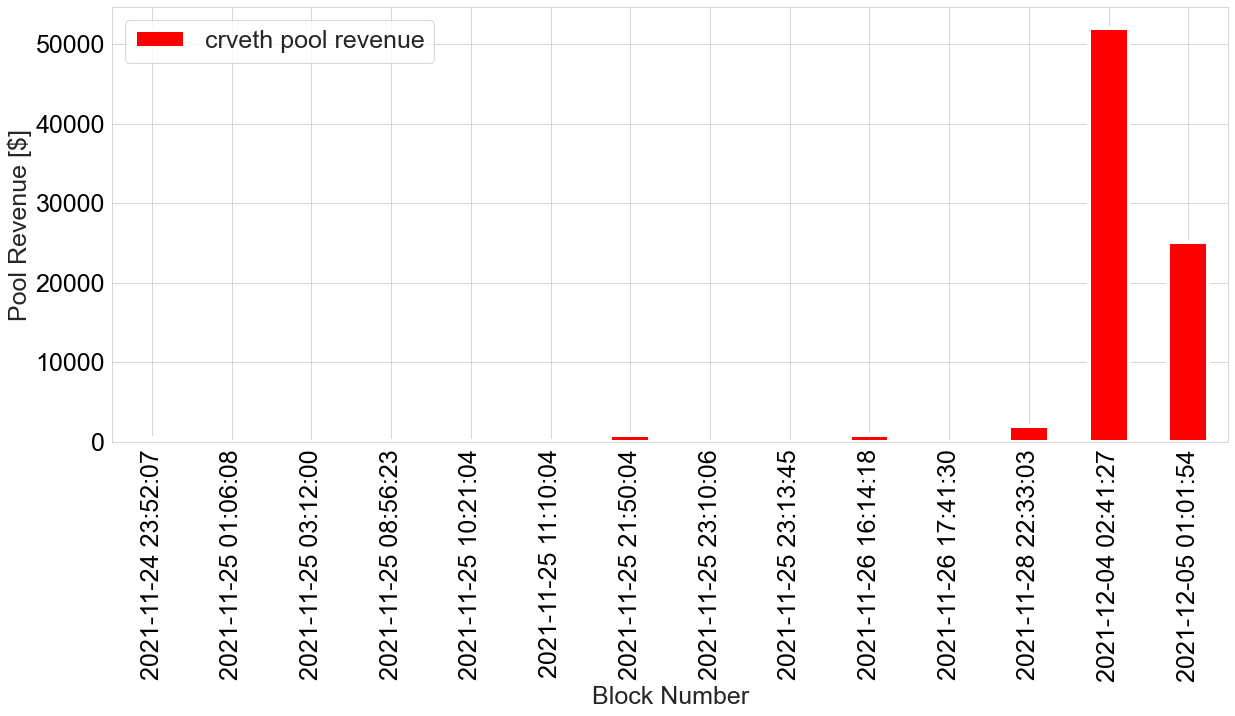

In [56]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['total_claimed_usd']*2).plot(
    ax=ax,
    color='red',
    label='crveth pool revenue',
    lw=4,
    kind='bar'
)

ax.set_ylabel("Pool Revenue [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);